# Ejercicio 2

a) Modelo supuesto:

$$y_{ij} =  \mu + \tau_i + \epsilon_{ij}$$

donde tenemos i tratamientos (1..5) y j observaciones y:

- $\mu$ es la media global 
- $\tau_i$ es el efecto del tratamiento i
- $\epsilon_{ij}$ es el error aleatorio de distribución Normal



b) Las suposiciones son: 

- Los $\epsilon_{ij}$ siguen una distribución normal con media cero.
- Los $\epsilon_{ij}$ son independientes entre sí.
- Los residuos de cada tratamiento tienen la misma varianza $\sigma^2$.


c) Cargamos los datos y los visualizamos

In [1]:
datos = read.csv("/home/emiliano/EstadisticaAplicada/practica/gallinas.csv", sep=",", header=TRUE)
# es buena practiva ver la estructura para saber si tomo como factores los datos
str(datos)
levels(Etapa)

'data.frame':	25 obs. of  2 variables:
 $ Etapa  : Factor w/ 5 levels "60gSalvado","80gSalvado",..: 5 5 5 5 5 3 3 3 3 3 ...
 $ SueroT3: num  94.1 90.5 99.4 73.6 74.4 ...


ERROR: Error in levels(Etapa): object 'Etapa' not found


**R ordena los datos alfabeticamente según el factor y luego usará el primero como control.** Si quisieramos cambiar el orden compulsivamente hacemos:

``etapa = factor(Etapa, levels=c('Premuda', 'Ayuno', '60gSalvado', '80gSalvado', 'Mezcla'))``

In [2]:
attach(datos)
etapa = factor(Etapa, levels=c('Premuda', 'Ayuno', '60gSalvado', '80gSalvado', 'Mezcla'))

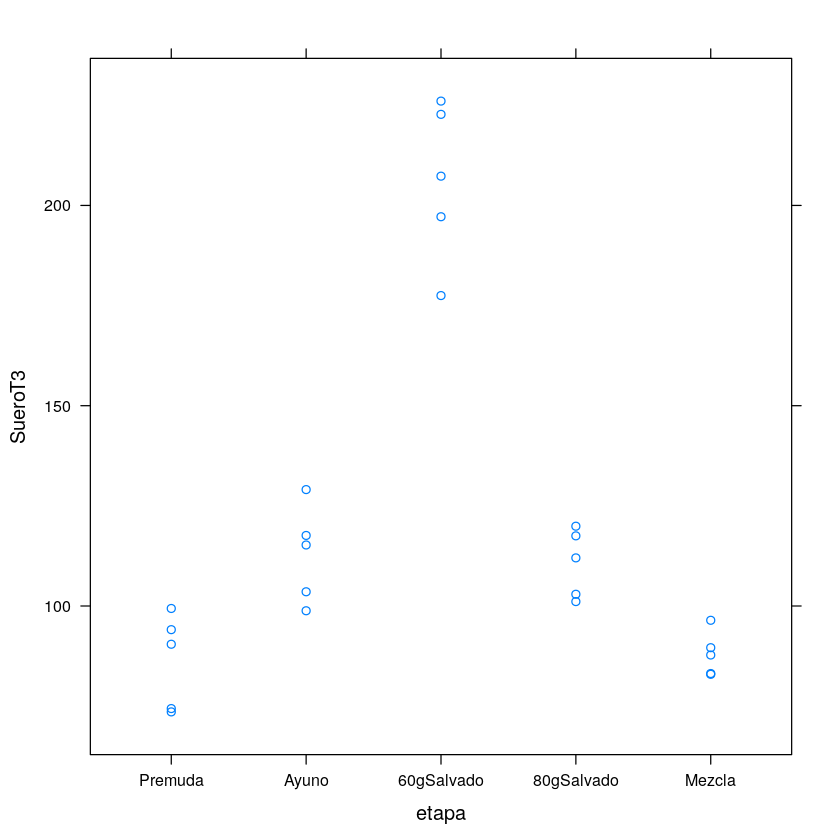

In [3]:
#no conviene el boxplot pq son pocos datos
library(lattice)
xyplot(SueroT3~etapa, data = datos)

**c)** Vemos que el tratamiento afecta a la respuesta ya que al hacer el análisis ANOVA obtenemos una tabla donde vemos que el p-valor pequeño (6.48E-12). 

De esta tabla es importante también el $MSE = Sp^2 = 156$, que usaremos en cálculos posteriores.

In [4]:
# Vemos de la tabla anova que el pvalor es pequeño

# Veamos la tabla ANOVA, que la guardamos en modelo
modelo = aov(SueroT3~etapa, data = datos)
summary(modelo)

            Df Sum Sq Mean Sq F value   Pr(>F)    
etapa        4  48569   12142   78.08 6.48e-12 ***
Residuals   20   3110     156                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [5]:
MSE = 156

In [6]:
# Calculamos el pvalor hecho a pata, como para corroborar las cuentas q hace R
pval = 1-pf(78.08, 5-1, 25-5)
pval

[1] 6.481704e-12

d) Analice la validez de los supuestos postulados en (b).

- **NORMALIDAD** Veamos si son normales son el test de shapiro, queremos obtener un pvalor grande para aceptar H0, es decir normalidad en la distribución de los datos

In [1]:
# esto nos da un resumen gráfico del modelo, pero no me gusta tanto
#plot(modelo)

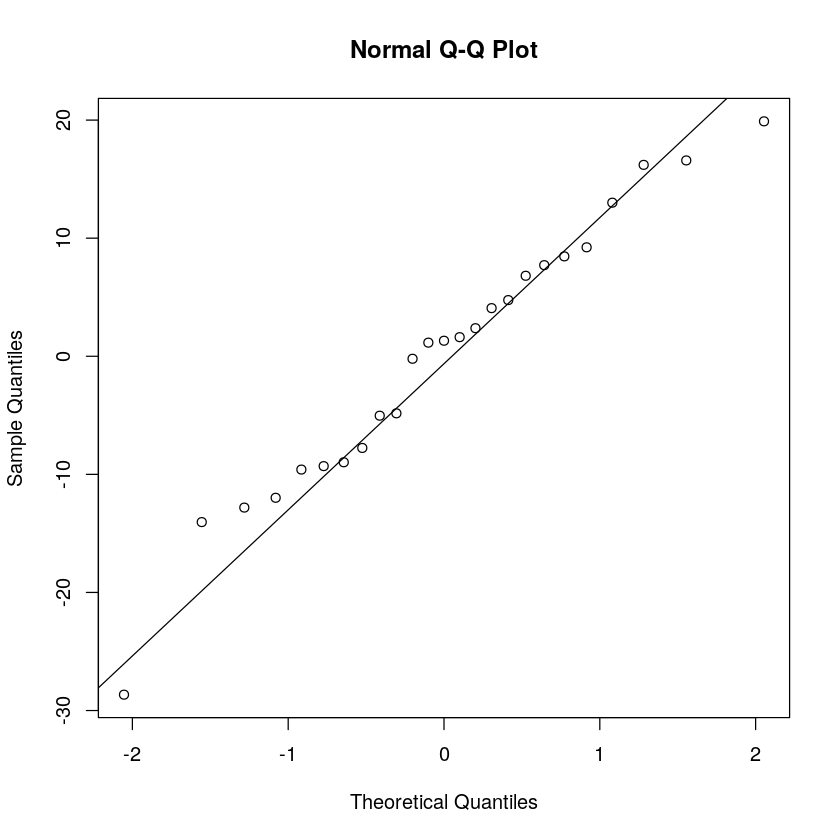

In [8]:
# vemos el qqnorm de los residuos del modelo
qqnorm(modelo$residuals)
qqline(modelo$residuals)

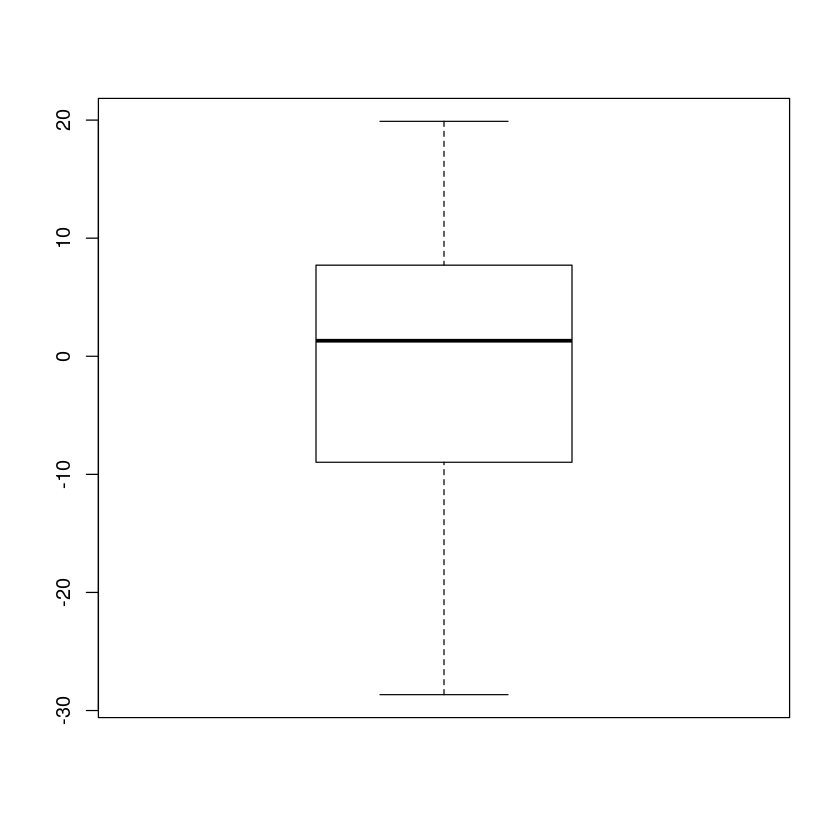

In [9]:
# podriamos querer hacer un boxplot de los residuos para ver si es mas o menos simétrico
boxplot(modelo$residuals)

In [10]:
# con este test vemos el pvalor, no encontró EVIDENCIA FUERTE en los datos en contra de la normalidad
shapiro.test(modelo$residuals)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.97412, p-value = 0.7498


- **VARIANZAS CONSTANTES:** *levene test* nos da un pvalor grande, por lo que no rechazamos H0, por ende no encontró EVIDENCIA SUFICIENTE para suponer que las varianzas son distintas, por lo que aceptamos que son iguales.

In [12]:
library(car)
leveneTest(modelo)

,Df,F value,Pr(>F)
group,4,1.553884,0.2251455
,20,NA,NA


**e)** Si necesita hacer alguna transformación de los datos o sacar algun outlier debe volver a repetir todos los incisos anteriores (y este) antes de contestar el próximo.

In [13]:
# vemos el pvalor etiquetado de Bonferonni (es mayor a 0.05 entonces no tenemos EVIDENCIA que hay valores atipicos)
# y nos da el candidato, que en este caso es 13, pero que no le damos bolilla por el pvalor
# podriamos o bien sacarlo del archivo (estrategia bestial) o sacarlo del modelo
# modeloSin13 = aov(SuertoT3~etapa, subset=-13) # o varios subset=-c(13, 15)

outlierTest(modelo)

No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferonni p
13 -3.059331          0.0064537      0.16134

In [14]:
# otra forma de ver outliers es usando un diagnostic plots influenceIndexPlot(modelo)

**f)** Usando comparaciones múltiples diga qué tratamientos son diferentes y cuáles son estadı́sticamente equivalentes al control. Reporte los resultados obtenidos en cotexto del problema.

In [15]:
# vamos a hacer lo mismo usando etapa ordenada, dejando en primer lugar el que vamos a usar de control, 
# ya lo hice así desde arriba porque lo cambié en clases (factor(Etapa, levels)), si modelo sería el anterior
# modelo1 = aov(SueroT3~etapa)

# tambien podriamos haber dejado primero el que queriamos usando relevel
# newEtapa = relevel(Etapa, 'Premuda')

In [16]:
# hay una forma completa (se puede usar en casi cualquier problema) y otra mas restringida
library(multcomp) # multcomp: multiples comparaciones
# test de hipotesis lineal generalizada (glht)
# linfct defino la funcion de contraste, le digo para q contrastes quiero hacer comparaciones multiples
# pondriamos etapa = "Tukey" si quisieramos hacer comparaciones entre todas

T2 = glht(modelo, linfct = mcp(etapa = "Dunnet"), alternative="two.sided")
# esto nos da una tabla donde nos muestra los puntos centrales de los IC y los pvalores
summary(T2)
# esto nos muestra los interfalos de confianza, vemos cual contiene al 0
confint(T2, level = .95)

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser




	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = SueroT3 ~ etapa, data = datos)

Linear Hypotheses:
                          Estimate Std. Error t value Pr(>|t|)    
Ayuno - Premuda == 0        26.478      7.887   3.357   0.0109 *  
60gSalvado - Premuda == 0  119.782      7.887  15.187   <0.001 ***
80gSalvado - Premuda == 0   24.320      7.887   3.084   0.0200 *  
Mezcla - Premuda == 0        1.598      7.887   0.203   0.9987    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = SueroT3 ~ etapa, data = datos)

Quantile = 2.6509
95% family-wise confidence level
 

Linear Hypotheses:
                          Estimate lwr      upr     
Ayuno - Premuda == 0       26.4780   5.5702  47.3858
60gSalvado - Premuda == 0 119.7820  98.8742 140.6898
80gSalvado - Premuda == 0  24.3200   3.4122  45.2278
Mezcla - Premuda == 0       1.5980 -19.3098  22.5058


In [ ]:
# esto habiamos probado nosotros y estaba RE mal
#source("/home/emiliano/EstadisticaAplicada/practica/mymultcomp.R") # llamo al archivo dnd esta la funcion minHSU
#maxHSU(SueroT3, Etapa, alpha=0.05, MSE, 20)

**Dibujamos los IC y vemos que el último no es significativo contrastado con el control, el efecto no es significativo entre mezcla y premuda (control)**

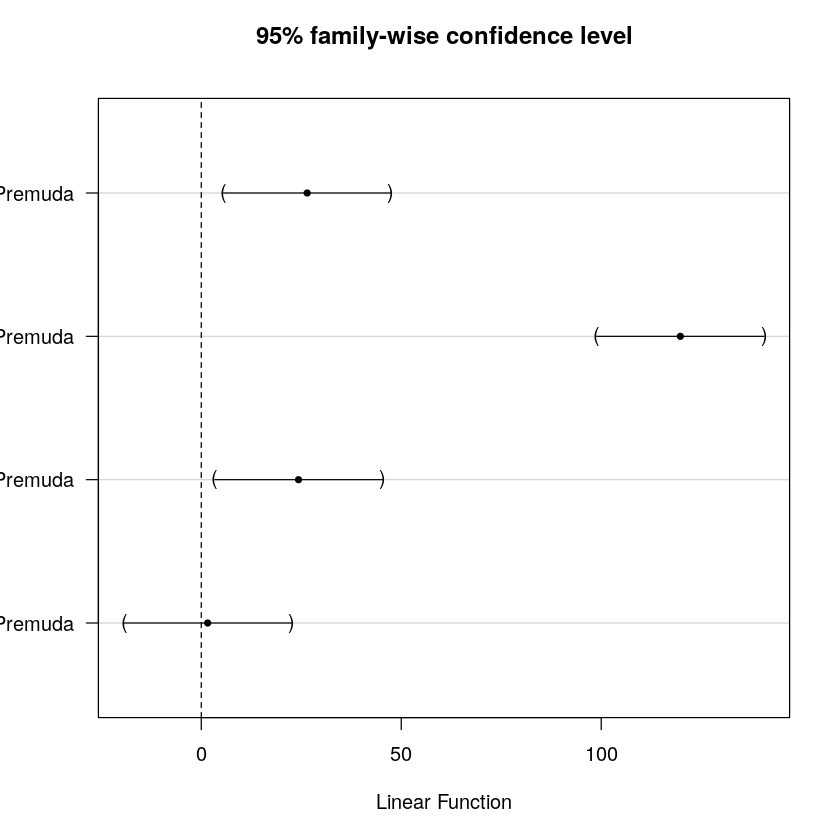

In [17]:
plot(confint(T2, level = .95))

In [18]:
# g) ¿Cuántas gallinas necesitaría el biólogo en cada tratamiento para rechazar la hipótesis nula a un
# nivel de significancia de α = 0.05, con una potencia de 0.90, si la diferencia entre el tratamiento
# de control y algún tratamiento nuevo es de 30 unidades de T3?

t = 5
alpha = 0.05
D = 30
sigma2 = 156
potencia_q_quiero = 0.9
r = 5
pot = 0
while (pot < potencia_q_quiero){
    r = r + 1
    # parametro de NO CENTRALIDAD lambda, es el corrimiento de la F de la H1
    lambda = (r * D * D) / ( 2*sigma2) 
    # valor critico de la region de rechazo
    A = qf(1-alpha, t-1, r*t-t)
    # calculamos la potencia
    pot = 1-pf(A, t-1, r*t-t, lambda)
}
r

[1] 7

In [19]:
# R ya lo hace solo a lo anterior
D = 30
library(pwr)
pwr.anova.test(k = 5, sig.level = 0.05, power = 0.9, f = sqrt(D^2/(2*5*MSE)))


     Balanced one-way analysis of variance power calculation 

              k = 5
              n = 6.372452
              f = 0.7595545
      sig.level = 0.05
          power = 0.9

NOTE: n is number in each group


In [20]:
# si ahora quiero saber la potencia determinada para un n fijo
pwr.anova.test(k = 5, sig.level = 0.05, n = 6, f = sqrt(D^2/(2*5*MSE)))


     Balanced one-way analysis of variance power calculation 

              k = 5
              n = 6
              f = 0.7595545
      sig.level = 0.05
          power = 0.8748368

NOTE: n is number in each group


vemos que para n=6 obtenemos una potencia de 0.87

# Ejercicio 3 hecho x profesor reordenado para que el control este al principio

In [21]:
K1 = c(1,-1,0,0,0) # premuda contra ayuno
K2 = c(0,1,-1,0,0) # ayuno - 60grSalvado
K3 = c(0,0,1,-1,0) # 60grSalvado - 80grSalvado
K4 = c(0,0,0,1,-1) # 80grSalvado - mezcla
library(lsmeans)
medias = summary(lsmeans(modelo,'etapa'))$lsmean
# es lo mismo que hacer
#medias = tapply(SueroT3, etapa, mean)

The 'lsmeans' package is being deprecated.
Users are encouraged to switch to 'emmeans'.
See help('transition') for more information, including how
to convert 'lsmeans' objects and scripts to work with 'emmeans'.


In [22]:
medias

[1]  86.374 112.852 206.156 110.694  87.972

In [23]:
# Los estimadores puntuales de los 4 contrastes
(C1hat = sum(K1*medias))
(C2hat = sum(K2*medias))
(C3hat = sum(K3*medias))
(C4hat = sum(K4*medias))

[1] -26.478

[1] -93.304

[1] 95.462

[1] 22.722

los errores estandares son la raiz cuadrada de las varianzas, que nos queda:

$$erroresContraste_j = \sqrt{{MSE\sum {{k_{ji}^2} \over {r}} }}$$

donde r es la cantidad de obsrevaciones si en cada tratamiento son iguales.

In [24]:
# ver que es lo mismo que nos dio una tabla arriba
r = 5
(SE_C1 = sqrt(MSE*sum(K1^2)/r))
(SE_C2 = sqrt(MSE*sum(K2^2)/r))
(SE_C3 = sqrt(MSE*sum(K3^2)/r))
(SE_C4 = sqrt(MSE*sum(K4^2)/r))

[1] 7.899367

[1] 7.899367

[1] 7.899367

[1] 7.899367

In [25]:
# si hacemos los IC ...
(c(C1hat-qt(1-0.05,20)*SE_C1, C1hat+qt(1-0.05,20)*SE_C1))
(c(C2hat-qt(1-0.05,20)*SE_C2, C2hat+qt(1-0.05,20)*SE_C2))
(c(C3hat-qt(1-0.05,20)*SE_C3, C3hat+qt(1-0.05,20)*SE_C3))
(c(C4hat-qt(1-0.05,20)*SE_C4, C4hat+qt(1-0.05,20)*SE_C4))

[1] -40.10218 -12.85382

[1] -106.92818  -79.67982

[1]  81.83782 109.08618

[1]  9.097818 36.346182

# Ejercicio 3 hecho x nosotros con otro orden

1) premuda contra ayuno, 2) ayuno contra 60 g de salvado, 3) 60 contra 80 g de salvado y 4) 80 g de salvado contra mezcla de malta:

In [17]:
library(lsmeans)
medias = lsmeans(modelo, "Etapa")
print(medias)

The 'lsmeans' package is being deprecated.
Users are encouraged to switch to 'emmeans'.
See help('transition') for more information, including how
to convert 'lsmeans' objects and scripts to work with 'emmeans'.


 Etapa       lsmean       SE df  lower.CL  upper.CL
 60gSalvado 206.156 5.576907 20 194.52278 217.78922
 80gSalvado 110.694 5.576907 20  99.06078 122.32722
 Ayuno      112.852 5.576907 20 101.21878 124.48522
 Mezcla      87.972 5.576907 20  76.33878  99.60522
 Premuda     86.374 5.576907 20  74.74078  98.00722

Confidence level used: 0.95 


In [52]:
# premuda - ayuno = u1 - u3
theta1 = 86.374 - 112.852
k1 = c(1,0,-1,0,0)
n = c(5,5,5,5,5)

Sp = sqrt(MSE)
A = qt(1-0.025,25-5)

Li = theta1 - A * Sp * sqrt(sum(k1^2/n))
Ls = theta1 + A * Sp * sqrt(sum(k1^2/n))

In [53]:
# ayuno - 60grSalvado = u3-u5
theta2 = 112.852 - 206.156
k2 = c(0,0,1,0,-1)

Li = theta2 - A * Sp * sqrt(sum(k2^2/n))
Ls = theta2 + A * Sp * sqrt(sum(k2^2/n))

In [54]:
# 60grSalvado-80grSalvado = u5-u4
theta3 = 206.156 - 110.694
k3 = c(0,0,0,-1,1)

Li = theta3 - A * Sp * sqrt(sum(k3^2/n))
Ls = theta3 + A * Sp * sqrt(sum(k3^2/n))
Li
Ls

[1] 78.98421

[1] 111.9398

In [55]:
# 80grSalvado - mezcla = u4-u2
theta4 = 110.694 - 87.972
k4 = c(0,-1,0,1,0)

Li = theta4 - A * Sp * sqrt(sum(k4^2/n))
Ls = theta4 + A * Sp * sqrt(sum(k4^2/n))
Li
Ls

[1] 6.244209

[1] 39.19979

In [56]:
# Veamos la ortogonalidad de los contrastes
sum(k1*k2)
sum(k1*k3)
sum(k1*k4)
sum(k2*k3)
sum(k2*k4)
sum(k3*k4)

[1] -1

[1] 0

[1] 0

[1] -1

[1] 0

[1] -1